In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                  shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(r'D:\small_dataset\small_dataset\training_set',
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 10 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(r'D:\small_dataset\small_dataset\test_set',
                                           target_size=(64,64),
                                            batch_size=32,
                                            class_mode='binary')

Found 10 images belonging to 2 classes.


In [4]:
cnn = Sequential()

In [5]:
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(MaxPooling2D(pool_size=2,strides=2))

In [7]:
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(MaxPooling2D(pool_size=2,strides=2))

In [8]:
cnn.add(Flatten())

In [9]:
cnn.add(Dense(units=128,activation='relu'))

In [10]:
cnn.add(Dense(units=1,activation='sigmoid'))

In [11]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
cnn.fit(x = training_set,validation_data = test_set,epochs = 25)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step - accuracy: 0.5000 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.8707
Epoch 2/25


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5000 - loss: 0.8512 - val_accuracy: 0.5000 - val_loss: 0.8271
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5000 - loss: 0.7441 - val_accuracy: 0.5000 - val_loss: 0.7850
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5000 - loss: 0.6985 - val_accuracy: 0.4000 - val_loss: 0.7162
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9000 - loss: 0.6298 - val_accuracy: 0.5000 - val_loss: 0.7377
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7000 - loss: 0.6054 - val_accuracy: 0.5000 - val_loss: 0.7549
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7000 - loss: 0.6190 - val_accuracy: 0.4000 - val_loss: 0.7454
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7000 - loss: 0.5737 - val_accuracy: 0.3000 - val_loss: 0.7434
Epoch 9/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9000 - loss: 0.5344 - val_accuracy: 0.4000 - val_loss: 0.7713
Epoch 10/25

In [13]:
import numpy as np
from keras.preprocessing import image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


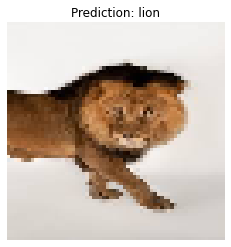

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
test_image = image.load_img(r'D:\small_dataset\small_dataset\single_prediction\lion.jpeg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict the class
result = cnn.predict(test_image)

# Get class indices (you need to have your training set loaded)
# training_set.class_indices   # This would return a dictionary like {'lion': 0, 'dog': 1}, or vice versa

# Assuming the model predicts the label, map the result to 'lion' or 'dog'
if result[0][0] == 1:
    prediction = 'lion'
else:
    prediction = 'dog'

# Display the image with the prediction
plt.imshow(test_image[0].astype('uint8'))  # The test_image is a batch, so index [0] to get the actual image
plt.title(f"Prediction: {prediction}")  # Add the prediction as the title
plt.axis('off')  # Hide axis
plt.show()


In [24]:
print(prediction)

lion
